In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir(r'D:\Datasets')

In [86]:
df = pd.read_csv('Ecommerce Purchases')
columns = list(df.columns)
df.tail()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
9995,"966 Castaneda Locks\nWest Juliafurt, CO 96415",92 XI,PM,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/5352 ...,Randall-Sloan,342945015358701,03/22,838,JCB 15 digit,iscott@wade-garner.com,Printmaker,29.73.197.114,it,82.21
9996,"832 Curtis Dam Suite 785\nNorth Edwardburgh, T...",41 JY,AM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Hale, Collins and Wilson",210033169205009,07/25,207,JCB 16 digit,mary85@hotmail.com,Energy engineer,121.133.168.51,pt,25.63
9997,Unit 4434 Box 6343\nDPO AE 28026-0283,74 Zh,AM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...,Anderson Ltd,6011539787356311,05/21,1,VISA 16 digit,tyler16@gmail.com,Veterinary surgeon,156.210.0.254,el,83.98
9998,"0096 English Rest\nRoystad, IA 12457",74 cL,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_8;...,Cook Inc,180003348082930,11/17,987,American Express,elizabethmoore@reid.net,Local government officer,55.78.26.143,es,38.84
9999,"40674 Barrett Stravenue\nGrimesville, WI 79682",64 Hr,AM,Mozilla/5.0 (X11; Linux i686; rv:1.9.5.20) Gec...,Greene Inc,4139972901927273,02/19,302,JCB 15 digit,rachelford@vaughn.com,"Embryologist, clinical",176.119.198.199,el,67.59


In [12]:
# top 5 purchasers
df['Company'].value_counts()[:5].to_frame()

,Company
Brown Ltd,15
Smith Group,15
Smith PLC,13
Smith LLC,13
Williams LLC,12


In [18]:
# Which browsers used most
df['Browser Info'].apply(lambda x:x.split('/')[0]).value_counts()

Mozilla    7924
Opera      2076
Name: Browser Info, dtype: int64

In [19]:
columns

['Address',
 'Lot',
 'AM or PM',
 'Browser Info',
 'Company',
 'Credit Card',
 'CC Exp Date',
 'CC Security Code',
 'CC Provider',
 'Email',
 'Job',
 'IP Address',
 'Language',
 'Purchase Price']

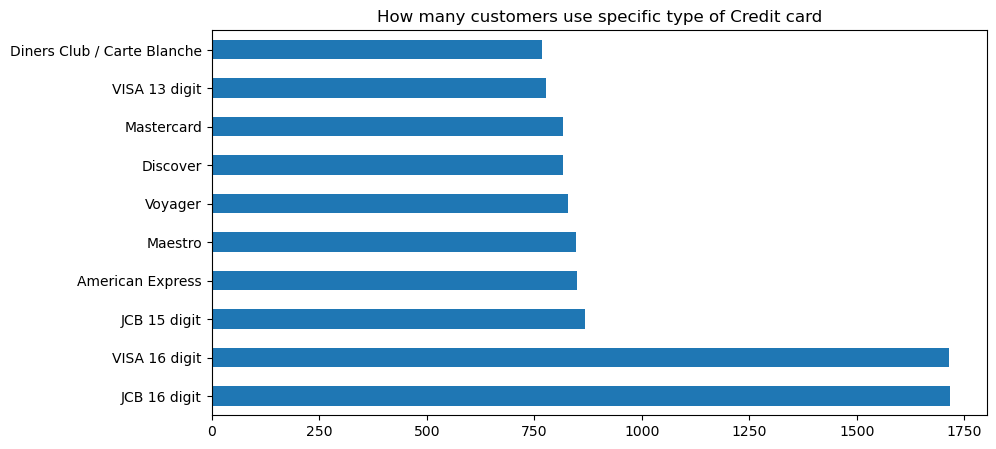

Diners Club / Carte Blanche     767
VISA 13 digit                   777
Mastercard                      816
Discover                        817
Voyager                         829
Maestro                         846
American Express                849
JCB 15 digit                    868
VISA 16 digit                  1715
JCB 16 digit                   1716


In [28]:
# how many customers use specific type of Credit card
plt.figure(figsize=(10,5))
df['CC Provider'].value_counts().plot(kind='barh')
plt.title('How many customers use specific type of Credit card')
plt.show()
print(df['CC Provider'].value_counts().sort_values(ascending=True).to_string())

In [29]:
# Highest and Lowest Purchase Prices.
print('Highest Purchase Price',df['Purchase Price'].max())
print('Lowest Purchase Price',df['Purchase Price'].min())

Highest Purchase Price 99.99
Lowest Purchase Price 0.0


In [33]:
# How many people have French 'fr' as their Language?
print('Number of people have French as their language is',len(df[df['Language']=='fr']))

Number of people have French as their language is 1097


In [47]:
# Number of languages in this dataset and number of people speaking each language
print(df['Language'].value_counts().to_string())
print('Total',len(df['Language'].value_counts().keys()),'languages are there in this dataset.')

de    1155
ru    1155
el    1137
pt    1118
en    1098
fr    1097
es    1095
it    1086
zh    1059
Total 9 languages are there in this dataset.


In [53]:
# Job Title Contains Engineer
print('There are total',len(df[df['Job'].str.contains('engineer',case=False)]['Job'].value_counts()),'job titles with engineers')

There are total 61 job titles with engineers


In [50]:
# To 10 email provider used
print(df['Email'].apply(lambda x:x.split('@')[1]).value_counts()[:10].to_string())

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
brown.com         29
johnson.com       29
davis.com         25
jones.com         25
martinez.com      19


In [78]:
# card expiring in the year 2024
df['Expire Year'] = df['CC Exp Date'].apply(lambda x:x.split('/')[1])
print(df['Expire Year'].value_counts().to_string())
print('Number of cards with expiry year 2024 is',len(df[df['Expire Year']=='24']))

25    1033
23    1010
21    1006
22     996
18     995
19     995
24     992
20     988
17     955
26     654
16     376
Number of cards with expiry year 2024 is 992


In [87]:
# Find The Email of the person with the following IP Address: 132.207.160.22
print('Email of person with IP address 132.207.160.22 is',df[df['IP Address']=='132.207.160.22']['Email'])

Email of person with IP address 132.207.160.22 is 2    amymiller@morales-harrison.com
Name: Email, dtype: object


In [93]:
# Occupation of the person with IP Address 121.133.168.51
df[df['IP Address']=='121.133.168.51']['Job']

9996    Energy engineer
Name: Job, dtype: object

In [95]:
# How many people purchase during the AM and how many people purchase during PM?
df['AM or PM'].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Purchasing manager                   27
Designer, jewellery                  27
Research officer, political party    27
Charity fundraiser                   26
Designer, fashion/clothing           26
Social worker                        26
Dietitian                            26


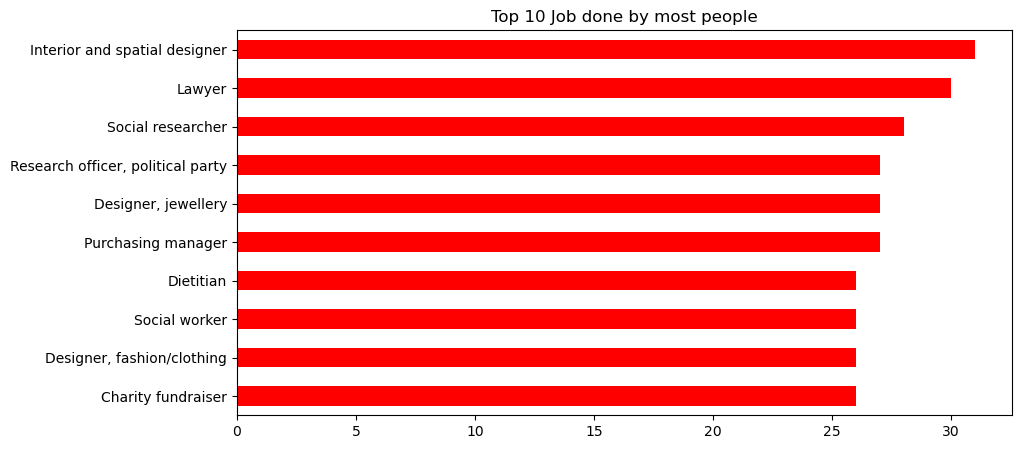

In [113]:
# Top 10 Job done by most people
plt.figure(figsize=(10,5))
df['Job'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh',color='r',)
plt.title('Top 10 Job done by most people')
print(df['Job'].value_counts()[:10].sort_values(ascending=False).to_string())